In [1]:
import numpy as np
import matplotlib.pyplot as plt
import netCDF4 as nc
from IPython.display import clear_output
import os

In [2]:
os.chdir("snaps_64_16_48_uflux8")

In [3]:
ds_co2_path = nc.Dataset("nc_files/co2_path.xy.nc")
ds_co2 = nc.Dataset("nc_files/co2.xy.nc")
ds_u = nc.Dataset("nc_files/u.xy.nc")
ds_v = nc.Dataset("nc_files/v.xy.nc")
ds_w = nc.Dataset("nc_files/w.xy.nc")

In [4]:
co2_path = np.array(ds_co2_path.variables["co2_path"][:])
co2 = np.array(ds_co2.variables["co2"][:])
u = np.array(ds_u.variables["u"][:])
v = np.array(ds_v.variables["v"][:])
w = np.array(ds_w.variables["w"][:])

In [5]:
# save co2_path, co2, u, v, w
np.save("npy_files/co2_path.npy", co2_path)
np.save("npy_files/co2_xy.npy", co2)
np.save("npy_files/u_xy.npy", u)
np.save("npy_files/v_xy.npy", v)
np.save("npy_files/w_xy.npy", w)

KeyboardInterrupt: 

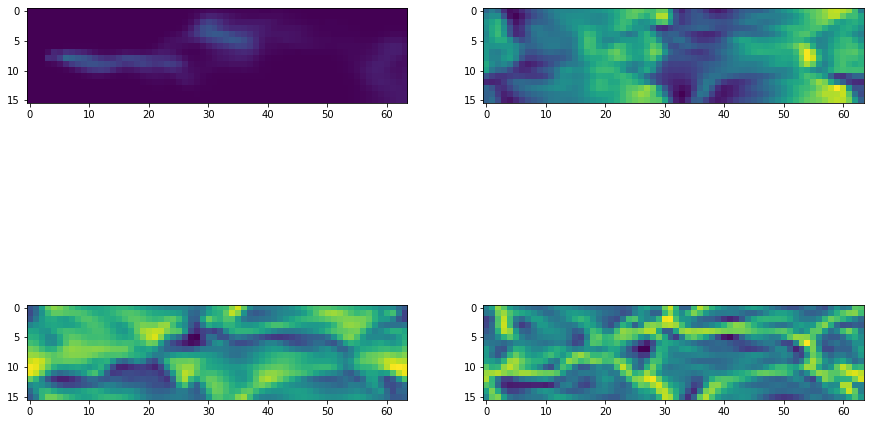

In [6]:
for i in range(len(co2_path)):
    plt.figure(figsize=(15, 10))
    plt.subplot(2, 2, 1)
    plt.imshow(co2_path[i], vmin=0, vmax=0.5)
    plt.subplot(2, 2, 2)
    plt.imshow(u[i, 0])
    plt.subplot(2, 2, 3)
    plt.imshow(v[i, 0])
    plt.subplot(2, 2, 4)
    plt.imshow(w[i, 0])
    plt.pause(0.01)
    clear_output(wait=True)

In [6]:
u_mean = np.mean(u[100:], axis=0)
v_mean = np.mean(v[100:], axis=0)
w_mean = np.mean(w[100:], axis=0)

u_prime = u - u_mean
v_prime = v - v_mean
w_prime = w - w_mean

tke = 0.5 * (u_prime**2 + v_prime**2 + w_prime**2)
tke_time_series = np.mean(tke, axis=(2, 3))

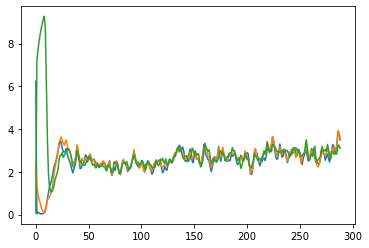

In [7]:
plt.plot(tke_time_series)

In [8]:
np.mean(tke_time_series[-100:], axis=0)

array([2.78279771, 2.84161373, 2.83762059])

In [9]:
ds_co2 = nc.Dataset("nc_files/co2.xz.nc")
ds_u = nc.Dataset("nc_files/u.xz.nc")
ds_v = nc.Dataset("nc_files/v.xz.nc")
ds_w = nc.Dataset("nc_files/w.xz.nc")

In [10]:
co2 = np.array(ds_co2.variables["co2"][:])
u = np.array(ds_u.variables["u"][:])
v = np.array(ds_v.variables["v"][:])
w = np.array(ds_w.variables["w"][:])

In [11]:
# save co2, u, v, w
np.save("npy_files/co2_xz.npy", co2)
np.save("npy_files/u_xz.npy", u)
np.save("npy_files/v_xz.npy", v)
np.save("npy_files/w_xz.npy", w)

In [13]:
for i in range(len(co2)):
    plt.figure(figsize=(10, 10))
    plt.subplot(2, 2, 1)
    plt.imshow(co2[i, :, 0, :], origin="lower")
    plt.subplot(2, 2, 2)
    plt.imshow(u[i, :, 0, :], origin="lower")
    plt.subplot(2, 2, 3)
    plt.imshow(v[i, :, 0, :], origin="lower")
    plt.subplot(2, 2, 4)
    plt.imshow(w[i, :, 0, :], origin="lower")
    plt.pause(0.01)
    clear_output(wait=True)

KeyboardInterrupt: 

In [12]:
u_mean = np.mean(u[100:], axis=0)
v_mean = np.mean(v[100:], axis=0)
w_mean = np.mean(w[100:], axis=0)

u_prime = u - u_mean
v_prime = v - v_mean
w_prime = w - w_mean

tke = 0.5 * (u_prime**2 + v_prime**2 + w_prime**2)
tke_time_series = np.mean(tke, axis=(1, 3))

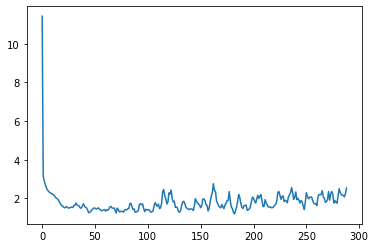

In [13]:
plt.plot(tke_time_series)

In [14]:
np.mean(tke_time_series[-100:], axis=0)

array([1.92953513])

# Summary of results

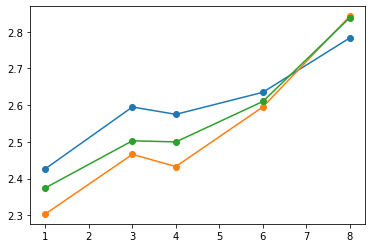

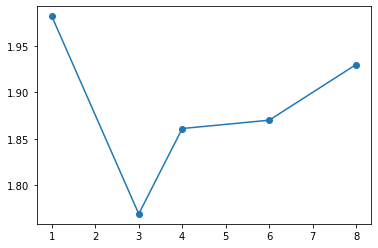

In [19]:
ufluxes = [4, 3, 1, 6, 8]

TKE_h1 = [2.575, 2.595, 2.427, 2.635, 2.783]
TKE_h2 = [2.433, 2.466, 2.304, 2.595, 2.842]
TKE_h3 = [2.500, 2.503, 2.375, 2.610, 2.838]
TKE_xy = [1.861, 1.769, 1.982, 1.870, 1.930]

# sort by ufluxes
TKE_h1 = [TKE_h1[i] for i in np.argsort(ufluxes)]
TKE_h2 = [TKE_h2[i] for i in np.argsort(ufluxes)]
TKE_h3 = [TKE_h3[i] for i in np.argsort(ufluxes)]
TKE_xy = [TKE_xy[i] for i in np.argsort(ufluxes)]
ufluxes = sorted(ufluxes)

plt.plot(ufluxes, TKE_h1, label="h1", marker="o")
plt.plot(ufluxes, TKE_h2, label="h2", marker="o")
plt.plot(ufluxes, TKE_h3, label="h3", marker="o")
plt.show()

plt.plot(ufluxes, TKE_xy, label="xy", marker="o")
plt.show()